# EDA on Haberman's Survival Data Set

**Data Description:** The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**Attribute Information:** 
1. Age of patient at time of operation(numerical)
2. Patient's year of operation (year => 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year.


**Additional Information:**

The axillary lymph nodes are usually the first set of lymph nodes where breast cancer will spread.
A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.

**Objective:**
The Objective is to classify the patient in one of the two given classes and tell whether the patient will survive for 5 years or longer, or the patient will die within 5 years.

In [1]:
#Importing required pakages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#reading our DataSet
df = pd.read_csv('haberman.csv', names=['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'])

### Lets  start by getting a feel of the Data

In [3]:
df.head()

,Age,Op_Year,axil_nodes_det,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#how many DataPoints and Features are there.
#Shape gives us this information (number of rows, number of columns)

print(df.shape)
print('Number of Data-Points:', df.shape[0])
print('Number of Fearures:', df.shape[1])

(306, 4)
Number of Data-Points: 306
Number of Fearures: 4


In [5]:
#Column Names 
df.columns

Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')

In [6]:
#How many classes are there 
#Number of DataPoints per class

print('Number of classes:', df['Surv_status'].nunique())
print('\n'+'*'*50, '\n')
print('Number of DataPoints per class:')
print(df['Surv_status'].value_counts())

Number of classes: 2

************************************************** 

Number of DataPoints per class:
1    225
2     81
Name: Surv_status, dtype: int64


**Note:** Here 1 and 2 represents class labels, 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year.

In [7]:
#Information about our Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age               306 non-null int64
Op_Year           306 non-null int64
axil_nodes_det    306 non-null int64
Surv_status       306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [8]:
# Lets Have a look at some numbers which describe our Data

df.describe()

,Age,Op_Year,axil_nodes_det,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations:** 
1. Data contains 306 rows or DataPoints.
2. The Dependent Variable or class variable has two unique values with 225 DataPoints in class 1 and 81 DataPoints in class 2.
3. The Age ranges from 30 to 83 with mean age of 52.
4. The Op_Year ranges from 1958 to 1969.
5. The axil_nodes_det ranges from 0 to 52 with a mean of with a mean of 4, but the 50th percentile is 1. So we can conclude that we have outliers. 75 % of patients have 3 or less positive axillary nodes.

In [9]:
#lets split our data to get some more insights 
 
did_survived = df[df['Surv_status'] == 1]
didnot_survived = df[df['Surv_status'] == 2]

In [10]:
did_survived.describe()

,Age,Op_Year,axil_nodes_det,Surv_status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [11]:
didnot_survived.describe()

,Age,Op_Year,axil_nodes_det,Surv_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [12]:
print('90th Percentile for positive axillary nodes detected')
print('Did_survived:', np.percentile(did_survived['axil_nodes_det'], 90))
print('DidNot_survived:', np.percentile(didnot_survived['axil_nodes_det'], 90))

90th Percentile for positive axillary nodes detected
Did_survived: 8.0
DidNot_survived: 20.0


**Observations:**
The positive axillary nodes detected(axil_nodes_det) column is the most interesting one.
1. Patients that Survived shows lower values of positive axillary nodes detected as seen from the 25th, 50th and 75th percentile values
2. The 90th Percentile shows a significant difference in positive axillary nodes detected.

## Univaraite analysis

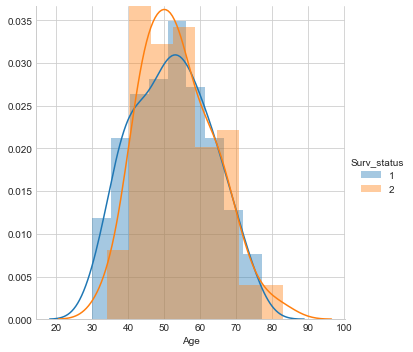

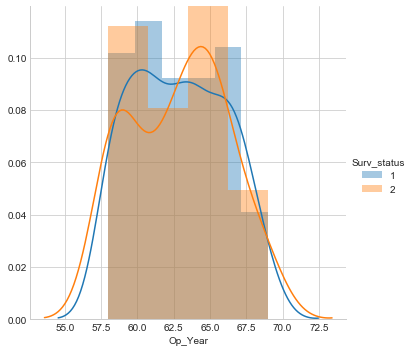

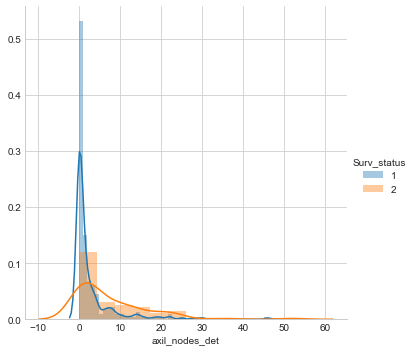

In [13]:
#Let's Tack a look at how out Features are Distrubuted
#hue = 'Surv_Status'


for col in df.columns[:-1]:
    sns.FacetGrid(df, hue="Surv_status", size=5) \
    .map(sns.distplot, col) \
    .add_legend();
    plt.show();

**Observations:**
1. Both Age and Op_Year overlaps quiet a bit for patients who did survived and did not survived.
2. The positive axillary nodes, for patients who did Survived is a lot more concentrated around 0 to 6 as compared to patients who did not survived.

In [14]:
#PDF and CDF plots
#please note that the combination of green and red Line for next three plots
#represents the patients who did not Survived
#the green represents PDF and the red Represents CDF

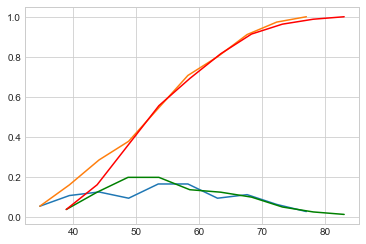

In [15]:
counts, bin_edges = np.histogram(did_survived['Age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)


plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(didnot_survived['Age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf, 'g')
plt.plot(bin_edges[1:], cdf, 'r')
plt.show()

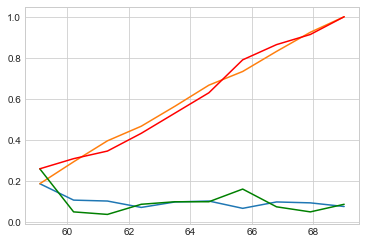

In [16]:
counts, bin_edges = np.histogram(did_survived['Op_Year'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(didnot_survived['Op_Year'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf, 'g')
plt.plot(bin_edges[1:], cdf, 'r')
plt.show()

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[ 0.83555556  0.91555556  0.93777778  0.96444444  0.98222222  0.98666667
  0.99555556  0.99555556  0.99555556  1.        ]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]

**************************************************************************************************** 

[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[ 0.56790123  0.71604938  0.85185185  0.90123457  0.97530864  0.97530864
  0.98765432  0.98765432  0.98765432  1.        ]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


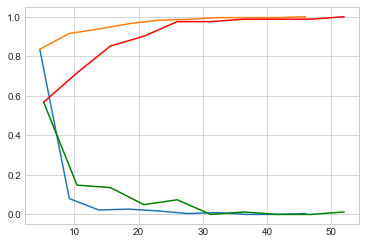

In [17]:
counts, bin_edges = np.histogram(did_survived['axil_nodes_det'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)
print(bin_edges)
print('\n'+'*'*100, '\n')

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(didnot_survived['axil_nodes_det'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)
print(bin_edges)

plt.plot(bin_edges[1:],pdf, 'g')
plt.plot(bin_edges[1:], cdf, 'r')
plt.show()

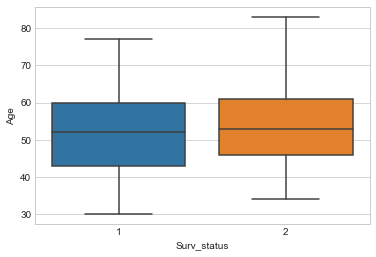

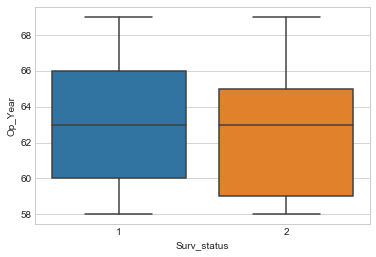

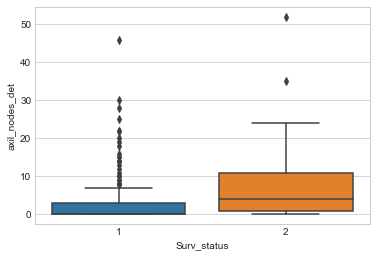

In [18]:
#Box Plots

for feature in df.columns[:-1]:
    sns.boxplot(x='Surv_status',y=feature, data=df)
    plt.show()

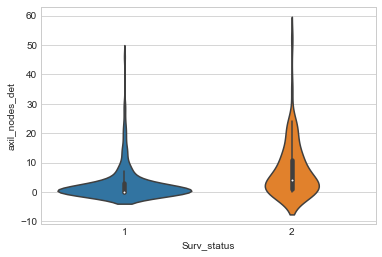

In [19]:
#Violin Plot

sns.violinplot(x='Surv_status',y='axil_nodes_det', data=df)
plt.show()

**Observations:**
1. From CDF plot we can see almost 83% of the patients have less than or equal to 5 positive lymph nodes.
2. The Box Plot Operation year for Patients who did survived is slightly higher as compared to the patients who did not survived.
3. We have quiet a bit outliers in positive axillary lymph node column for patients who did Survived. 

In [20]:
df.columns

Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')

## Bi-varaite analysis

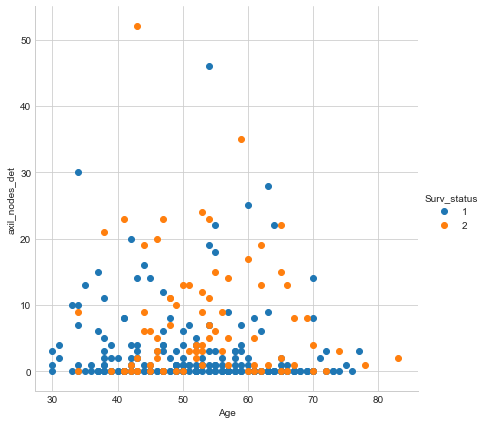

In [21]:
#Scatter Plot


sns.FacetGrid(df, hue='Surv_status', size=6) \
   .map(plt.scatter, 'Age', 'axil_nodes_det') \
   .add_legend()
plt.show()

In [22]:
def classvar(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'

df['Surv_status'] = df['Surv_status'].apply(classvar)    

In [23]:
df['Surv_status'].value_counts()

Yes    225
No      81
Name: Surv_status, dtype: int64

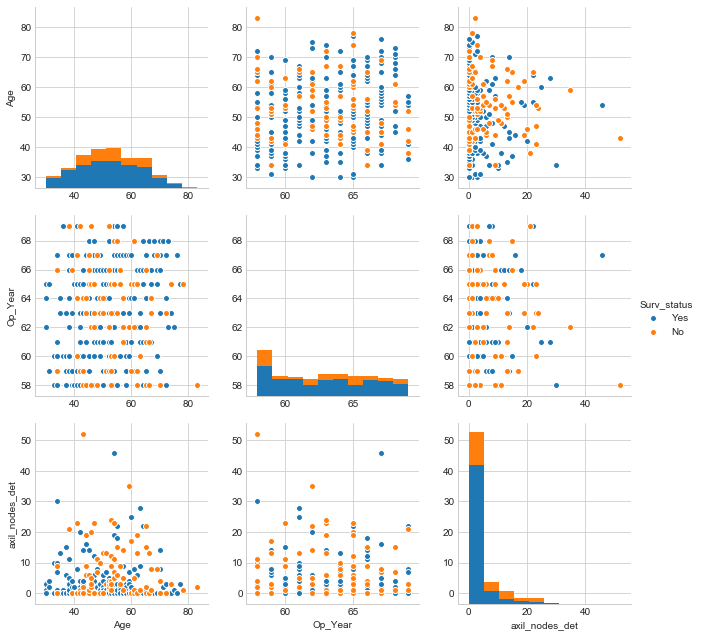

In [24]:
#Pair Plot

sns.pairplot(df, hue='Surv_status', size=3)
plt.show()

**Conclusion:**
1. The dataset does not contains euqal number of data-points for each class and is imbalenced. 
2. There is too much overlaping in data points.
3. The feature Positive axillary lymph nodes Detected is better than other features for insights.